# NASA Turbofan Jet Engine Data Set

The Data Incubator Capstone Project 092021<br>
Islam Abdelmotalib<br>
Last Update: 12/05/2021

# Data Source

NASA Turbofan Jet Engine Data Set
This Data set generated by NASA team using C-MAPSS simulator, The software is coded in the MATLAB® and Simulink® environment. for more data about how this data simulated check the referenece 

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

The Data Source is Kaggle 
https://www.kaggle.com/behrad3d/nasa-cmaps

# Data Description

This Data Set consist of four different data set simulated under different combinations of operational conditions and fault modes. Each data set divided into train and test, Train tables include time stamps (cycles) for each engine till failure, Test table include number of cycles for each engine before failure

The columns correspond to:
1) unit number

2) time, in cycles

3) operational setting 1

4) operational setting 2

5) operational setting 3

6) sensor measurement 1

7) sensor measurement 2

…

26) sensor measurement 26

# Project Objective

The objective to estimate the remaining useful life (RUL) for each engine in the Test Data Set. Reliably estimating remaining life could have many advantages as:

1) Cost savings (for example by avoiding unscheduled maintenance and by increasing equipment usage)

2) Operational safety improvements

3) Provide decision makers with information that allows them to change operational characteristics (such as load) which in turn may prolong the life of the component. 

4) It also allows planners to account for upcoming maintenance and set in motion a logistics process that supports a smooth transition from faulty equipment to fully functional. 

# Data Ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


In [3]:
FD001_train = pd.read_csv('Dataset/train_FD001.txt', sep=" ", header=None)
FD001_test = pd.read_csv('Dataset/test_FD001.txt', sep=" ", header=None)
FD001_RUL0 = pd.read_csv('Dataset/RUL_FD001.txt', sep=" ", header=None)
#FD001_train.columns = ["a", "b", "c", "etc."]

In [4]:
Columns=['unit', 'cycle','op1','op2','op3']+[f'sensor{x}' for x in range(1,24)]
Columns

['unit',
 'cycle',
 'op1',
 'op2',
 'op3',
 'sensor1',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor5',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor10',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor16',
 'sensor17',
 'sensor18',
 'sensor19',
 'sensor20',
 'sensor21',
 'sensor22',
 'sensor23']

In [5]:
FD001_train.columns = Columns
FD001_test.columns = Columns

In [6]:
FD001_train


,unit,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [6]:
FD001_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   unit      20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   op1       20631 non-null  float64
 3   op2       20631 non-null  float64
 4   op3       20631 non-null  float64
 5   sensor1   20631 non-null  float64
 6   sensor2   20631 non-null  float64
 7   sensor3   20631 non-null  float64
 8   sensor4   20631 non-null  float64
 9   sensor5   20631 non-null  float64
 10  sensor6   20631 non-null  float64
 11  sensor7   20631 non-null  float64
 12  sensor8   20631 non-null  float64
 13  sensor9   20631 non-null  float64
 14  sensor10  20631 non-null  float64
 15  sensor11  20631 non-null  float64
 16  sensor12  20631 non-null  float64
 17  sensor13  20631 non-null  float64
 18  sensor14  20631 non-null  float64
 19  sensor15  20631 non-null  float64
 20  sensor16  20631 non-null  fl

In [7]:
FD001_train.describe()

,unit,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [8]:
FD001_train['op3'].unique()

array([100.])

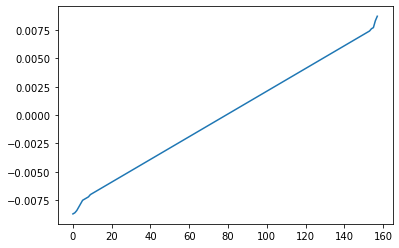

In [9]:
plt.plot(np.sort(FD001_train['op1'].unique()))

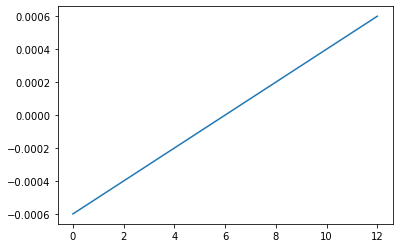

In [10]:
plt.plot(np.sort(FD001_train['op2'].unique()))

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
# Getting the RUL for each line
RUL_max=FD001_train.groupby('unit').max()['cycle'].to_frame().rename(columns={"cycle": "Max_RUL"})
FD001_RUL=FD001_train.merge(RUL_max,how='left', on='unit')
FD001_RUL['RUL']=FD001_RUL['Max_RUL']-FD001_RUL['cycle']
FD001_RUL


,unit,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,Max_RUL,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,200,1


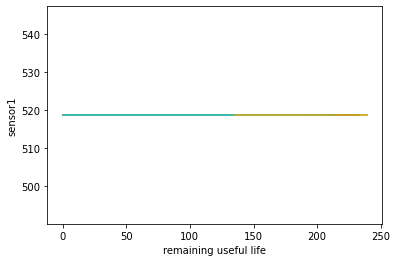

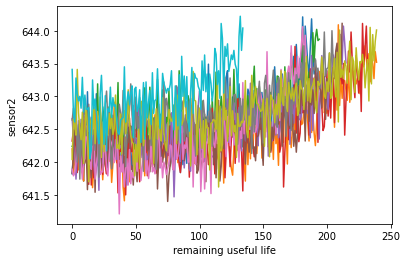

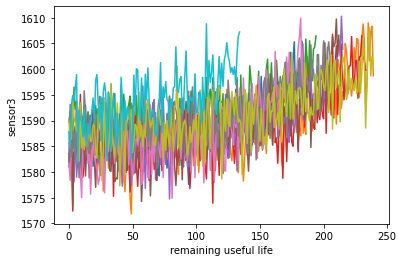

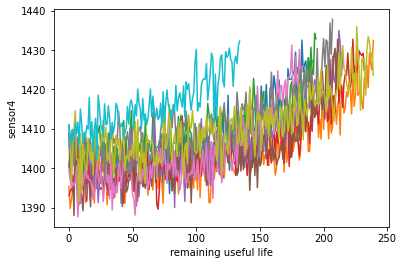

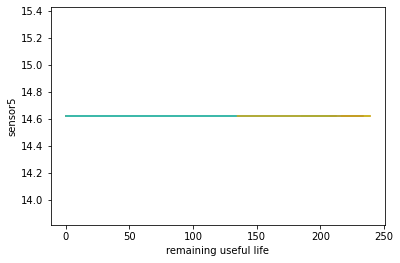

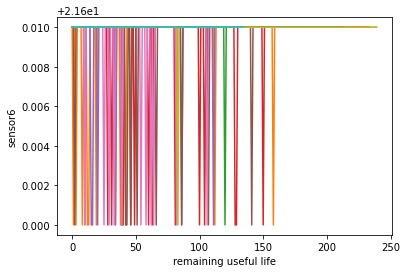

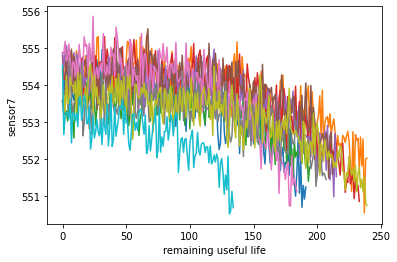

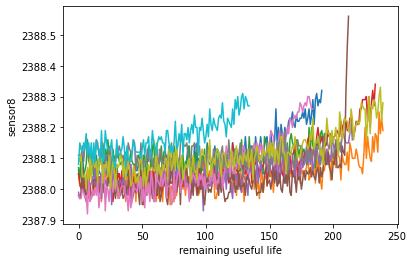

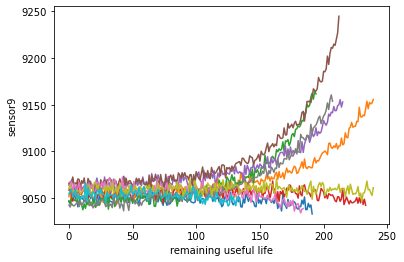

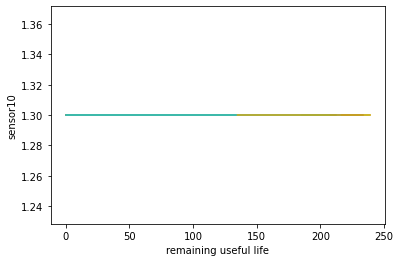

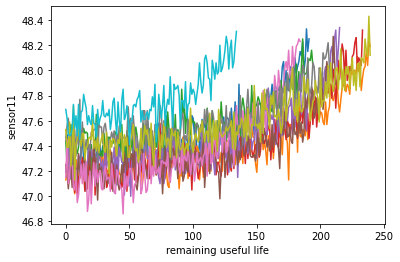

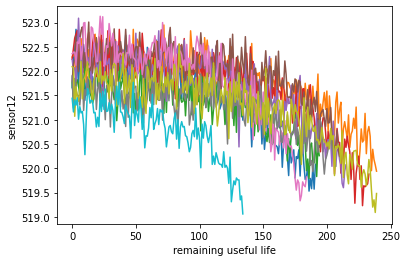

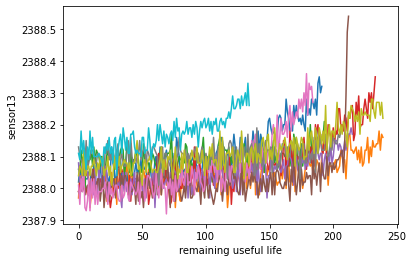

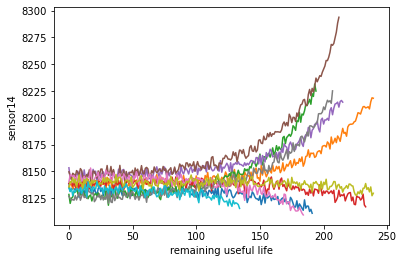

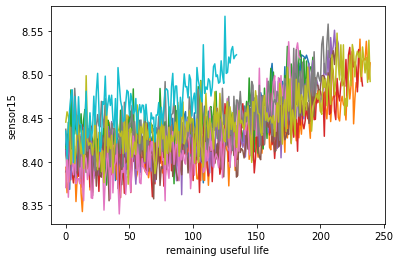

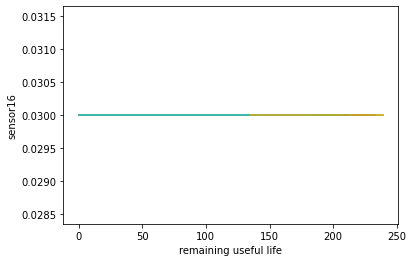

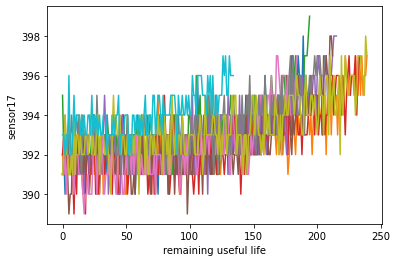

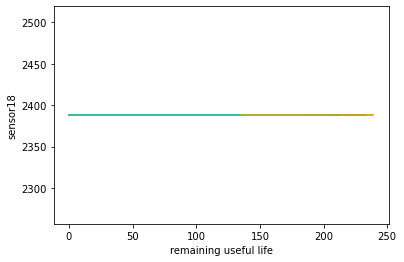

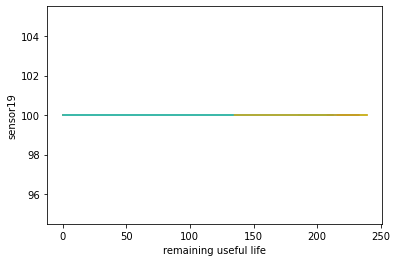

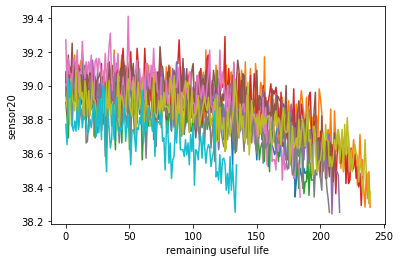

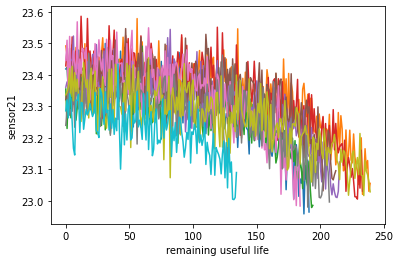

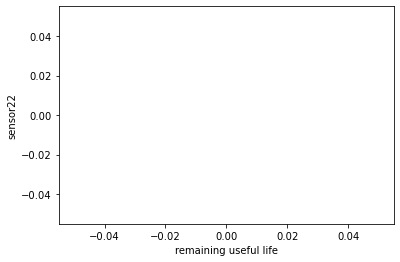

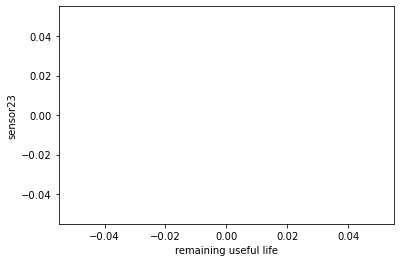

In [13]:
for i in FD001_RUL.columns[5:28]:
    for j in range(1,100,10):
        plt.plot(FD001_RUL[FD001_RUL['unit']==j]['RUL'][::-1],FD001_RUL[FD001_RUL['unit']==j][i])
    plt.xlabel('remaining useful life')
    plt.ylabel(i)
    plt.show()

the Graphs above shows that these factors

['op3','sensor1','sensor5','sensor10','sensor16','sensor18','sensor19','sensor22','sensor23']

don't have any variations againist the RUL, so will drop it from the training set

In [14]:
FD001_RUL=FD001_RUL.drop(labels=['op3','sensor1','sensor5','sensor10','sensor16','sensor18','sensor19','sensor22','sensor23'],axis=1)

The Charts above it shows that after 150 cycles the charts start to be random and it loses the patterns like senor 9 and 14

so I decided to drop all data after 150 cycles


In [15]:
FD001_RUL_150=FD001_RUL[FD001_RUL['RUL']<150]
FD001_RUL_150

,unit,cycle,op1,op2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,Max_RUL,RUL
42,1,43,-0.0027,0.0005,642.24,1591.52,1406.05,21.61,553.68,2388.03,9057.88,47.32,522.74,2388.09,8127.22,8.4068,392,38.99,23.3148,192,149
43,1,44,-0.0001,0.0002,641.93,1586.94,1401.20,21.61,554.15,2388.04,9046.87,47.45,522.30,2388.00,8131.45,8.4201,392,39.06,23.4753,192,148
44,1,45,-0.0013,-0.0000,642.53,1582.42,1399.16,21.61,553.83,2388.08,9060.32,47.45,521.73,2388.05,8128.31,8.4099,393,38.79,23.3943,192,147
45,1,46,0.0003,0.0001,642.43,1588.29,1401.27,21.61,553.76,2388.06,9060.38,47.20,522.02,2388.08,8128.71,8.3977,393,38.93,23.3745,192,146
46,1,47,0.0000,0.0005,642.21,1580.32,1402.89,21.61,554.38,2388.06,9052.04,47.22,521.84,2388.05,8126.21,8.3973,392,38.99,23.4873,192,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,200,1


# Machine Learning:

In [16]:
Final_Model0=Pipeline([
    ('Scaler',MinMaxScaler()),
    ('Ply_Feature', PolynomialFeatures(2)),
    ('Regressor',Ridge(alpha=1)) 
])

In [17]:
Final_Model0.fit(FD001_RUL_150[FD001_RUL_150.columns[4:19]],FD001_RUL_150['RUL'])

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Ply_Feature', PolynomialFeatures()),
                ('Regressor', Ridge(alpha=1))])

In [29]:
FD001_test


,unit,cycle,op1,op2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [30]:
FD001_test=FD001_test.drop(labels=['op3','sensor1','sensor5','sensor10','sensor16','sensor18','sensor19','sensor22','sensor23'],axis=1)
FD001_test

KeyError: "['op3' 'sensor1' 'sensor5' 'sensor10' 'sensor16' 'sensor18' 'sensor19'\n 'sensor22' 'sensor23'] not found in axis"

In [31]:
x_test=FD001_test.groupby('unit').last('cycle').drop(labels=['cycle','op1','op2'],axis=1)

In [32]:
x_test

,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
unit,,,,,,,,,,,,,,,
1,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
2,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
3,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
4,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
5,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,642.30,1590.88,1397.94,21.61,553.99,2388.03,9062.41,47.14,522.30,2388.01,8148.24,8.4110,391,38.96,23.4606
97,642.59,1582.96,1410.92,21.61,554.05,2388.06,9076.36,47.38,521.58,2388.06,8155.48,8.4500,395,38.61,23.2953
98,642.68,1599.51,1415.47,21.61,553.44,2388.13,9062.34,47.66,521.53,2388.09,8146.39,8.4235,394,38.76,23.3608


In [22]:
y_predict=Final_Model0.predict(x_test)

In [23]:
y_predict

array([126.83390606, 107.33383079,  72.37775599,  82.13167401,
        96.34729962,  94.17798102,  98.11424926,  82.48533623,
        89.8296693 ,  92.33621712,  80.88475589,  83.37970503,
        81.09356126, 100.24111342, 123.55527277, 105.87652216,
        56.10395846,  64.62728293,  99.31860261,  27.87138735,
        76.04126807, 115.21702006, 126.06817403,  16.31467626,
       117.01884425, 102.73404781, 110.65828764,  89.01978116,
        93.1155624 ,  81.37950204,  17.28230967,  60.93470541,
        85.82640725,  -0.96452665,   4.6110957 ,  33.42486736,
        70.35881361,  49.58773005, 117.04507964,  36.27259281,
        77.29310714,  24.3571172 ,  67.60296695,  97.78012135,
        66.31897847,  54.79700037, 103.31447956,  95.83961565,
        20.73453457,  97.45564512,  99.40928986,  30.35474849,
        37.20520743, 127.02487782, 112.29599653,  26.89248874,
        89.02119518,  53.98741118, 129.05643046,  96.41899565,
        45.68324503,  62.05886645,  68.23266301,  54.92

In [24]:
FD001_RUL0[0]

0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: 0, Length: 100, dtype: int64

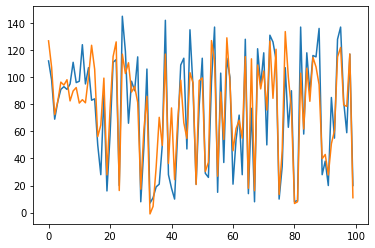

In [25]:
plt.plot(FD001_RUL0[0])
plt.plot(y_predict)

In [26]:
Final_Model0.score(x_test,FD001_RUL0[0])

0.7693782961969062

In [16]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor


In [17]:
Final_Model1=Pipeline([
    ('Scaler',MinMaxScaler()),
    ('Ply_Feature', PolynomialFeatures(2)),
    ('Regressor',RandomForestRegressor(max_depth=3, random_state=0)) 
])

In [18]:
Final_Model1.fit(FD001_RUL_150[FD001_RUL_150.columns[4:19]],FD001_RUL_150['RUL'])

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Ply_Feature', PolynomialFeatures()),
                ('Regressor',
                 RandomForestRegressor(max_depth=3, random_state=0))])

In [33]:
y_predict1=Final_Model1.predict(x_test)

In [34]:
Final_Model1.score(x_test,FD001_RUL0[0])

0.7579856728050257

# Visualizations:

In [27]:
pd.DataFrame(data=FD001_test.groupby('unit').last('cycle')['cycle'].reset_index())

,unit,cycle
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [28]:
viz01=pd.DataFrame(data=y_predict,columns=['Predicted RUL'])
viz01['Actual RUL']=FD001_RUL0[0]
viz01['current cycle']=pd.DataFrame(data=FD001_test.groupby('unit').last('cycle')['cycle'].reset_index())['cycle']
viz01['Predicted Life']=viz01['Predicted RUL']+viz01['current cycle']
viz01['Actual Life']=viz01['Actual RUL']+viz01['current cycle']
viz01['ave Life']=np.average(RUL_max['Max_RUL'])
viz01['Diff from avg']=viz01['Predicted Life']-viz01['ave Life']
viz01['Error']=((viz01['Actual Life']-viz01['Predicted Life'])/viz01['Actual Life']).abs()
viz01

,Predicted RUL,Actual RUL,current cycle,Predicted Life,Actual Life,ave Life,Diff from avg,Error
0,126.833906,112,31,157.833906,143,206.31,-48.476094,0.103734
1,107.333831,98,49,156.333831,147,206.31,-49.976169,0.063495
2,72.377756,69,126,198.377756,195,206.31,-7.932244,0.017322
3,82.131674,82,106,188.131674,188,206.31,-18.178326,0.000700
4,96.347300,91,98,194.347300,189,206.31,-11.962700,0.028293
...,...,...,...,...,...,...,...,...
95,121.968894,137,97,218.968894,234,206.31,12.658894,0.064235
96,79.559259,82,134,213.559259,216,206.31,7.249259,0.011300
97,78.427855,59,121,199.427855,180,206.31,-6.882145,0.107933
98,117.128132,117,97,214.128132,214,206.31,7.818132,0.000599


<AxesSubplot:xlabel='unit', ylabel='Diff from avg'>

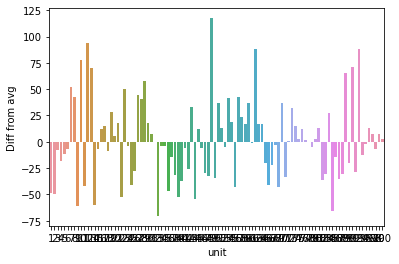

In [29]:
sns.barplot(x=x_test.reset_index()['unit'], y=viz01['Diff from avg'])

In [30]:
negative=np.average(viz01[viz01['Diff from avg']<=0]['Diff from avg'])
positive=np.average(viz01[viz01['Diff from avg']>0]['Diff from avg'])

polarity=['Safety concern' if x <= 0 else 'Cost Concern' for x in viz01['Diff from avg']]
polarity_avg=[negative if x <= 0 else positive for x in viz01['Diff from avg']]

In [42]:
viz01[viz01['Diff from avg']<=0]['Diff from avg'].shape


(53,)

In [31]:
viz01['Concern']=polarity
viz01['avg_concern']=polarity_avg
viz01['unit']=x_test.reset_index()['unit']
viz01

,Predicted RUL,Actual RUL,current cycle,Predicted Life,Actual Life,ave Life,Diff from avg,Error,Concern,avg_concern,unit
0,126.833906,112,31,157.833906,143,206.31,-48.476094,0.103734,Safety concern,-26.463978,1
1,107.333831,98,49,156.333831,147,206.31,-49.976169,0.063495,Safety concern,-26.463978,2
2,72.377756,69,126,198.377756,195,206.31,-7.932244,0.017322,Safety concern,-26.463978,3
3,82.131674,82,106,188.131674,188,206.31,-18.178326,0.000700,Safety concern,-26.463978,4
4,96.347300,91,98,194.347300,189,206.31,-11.962700,0.028293,Safety concern,-26.463978,5
...,...,...,...,...,...,...,...,...,...,...,...
95,121.968894,137,97,218.968894,234,206.31,12.658894,0.064235,Cost Concern,32.908001,96
96,79.559259,82,134,213.559259,216,206.31,7.249259,0.011300,Cost Concern,32.908001,97
97,78.427855,59,121,199.427855,180,206.31,-6.882145,0.107933,Safety concern,-26.463978,98
98,117.128132,117,97,214.128132,214,206.31,7.818132,0.000599,Cost Concern,32.908001,99


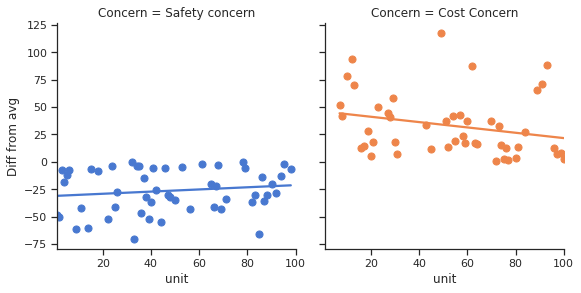

In [32]:
import seaborn as sns
sns.set_theme(style="ticks")


# Show the results of a linear regression within each dataset
ax01=sns.lmplot(x="unit", y="Diff from avg", col="Concern", hue="Concern", data=viz01,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})


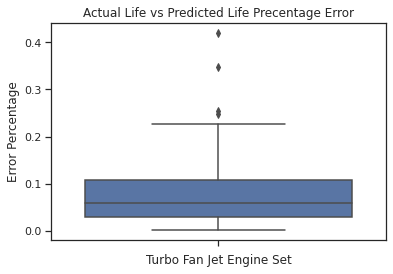

In [33]:
ax02 = sns.boxplot( y="Error", data=viz01).set(title='Actual Life vs Predicted Life Precentage Error',
                                            ylabel="Error Percentage",
                                            xlabel="Turbo Fan Jet Engine Set")


Violin Chart

In [34]:
Life=FD001_test.groupby('unit').last('cycle')['cycle'].to_frame()
Life['RUL']=y_predict
Life['Jet_Engine_Life']=Life['RUL']+Life['cycle']
Life['DataSet']='Test DataSet'

In [35]:
Life
life_test=Life[['Jet_Engine_Life','DataSet']].reset_index()
life_test

,unit,Jet_Engine_Life,DataSet
0,1,157.833906,Test DataSet
1,2,156.333831,Test DataSet
2,3,198.377756,Test DataSet
3,4,188.131674,Test DataSet
4,5,194.347300,Test DataSet
...,...,...,...
95,96,218.968894,Test DataSet
96,97,213.559259,Test DataSet
97,98,199.427855,Test DataSet
98,99,214.128132,Test DataSet


In [36]:
RUL_max=FD001_train.groupby('unit').max()['cycle'].to_frame().rename(columns={"cycle": "Jet_Engine_Life"}).reset_index()
RUL_max['DataSet']='Training DataSet'
Draw0=RUL_max.append(life_test).reset_index()

In [37]:
Draw0

,index,unit,Jet_Engine_Life,DataSet
0,0,1,192.000000,Training DataSet
1,1,2,287.000000,Training DataSet
2,2,3,179.000000,Training DataSet
3,3,4,189.000000,Training DataSet
4,4,5,269.000000,Training DataSet
...,...,...,...,...
195,95,96,218.968894,Test DataSet
196,96,97,213.559259,Test DataSet
197,97,98,199.427855,Test DataSet
198,98,99,214.128132,Test DataSet


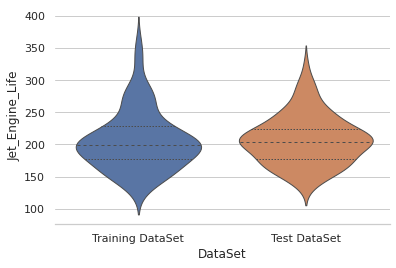

In [38]:

sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=Draw0, y="Jet_Engine_Life", x="DataSet",
               split=False, inner="quart", linewidth=1)
sns.despine(left=True)